# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Hello, and welcome to my analysis of Pokemon stats by Pokemon type and Pokemon generation! 

I began my analysis by getting familiar with my dataset, including viewing the levels of different variables and changing some variables from numeric to factor, etc. Pokemon can have up to two types, but I wanted to compare pokemon stats across types by counting Pokemon twice (once for each type). I used the pivot_longer function to combine the columns for the two types into one column for further analysis. I wanted to exclude Mega Evolutions from my dataset, so I did not include any observations in my analyses for which "Mega" was inlcuded in the pokemon name. This resulted in 720 unique Pokemon from 6 different generations and 18 different Pokemon types being included in the analysis.

After setting up my data, I was able to compare first the number of pokemon of each type in each generation. As we can see in the first figure I created, these counts are far from equal and each generation had not only a different overall number of Pokemon, but also an uneven split between the different types. This split was different across generations. I also demonstrated this difference by displaying the % out of all Pokemon for each type and generation. I did each of these things in two different ways: combined into one plot, and facet wrapped by generation. Each of these methods has different advantages and disadvantages to readability and interpretability, so I wanted to include both to maximize the reader's understanding of the data. Lastly, I used several plots (scaled heat maps and bar charts) to assess the overall average attack of each pokemon type overall and by each generation. This allowed me to observe particular batches of type/generation combinations that had especially low or high average attack power. I also was able to demonstrate how each type of Pokemon's average attack stats changed over time (over generations). 

In [1]:
library('tidyverse')
library('readxl')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
pokemon <- read_csv('Pokemon.csv')

pokemon |> head()

Rows: 800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


In [3]:
colnames(pokemon)[colnames(pokemon) == "Type 1"] = "Type_1"
colnames(pokemon)[colnames(pokemon) == "Type 2"] = "Type_2"

pokemon |> head()

#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


In [ ]:
#combine Type_1 and Type_2 

In [4]:
#pull Type 1 to extract Type_1 into Type_1_col

Type_1_col = pokemon$Type_1

Type_1_col |> head()

[1] "Grass" "Grass" "Grass" "Grass" "Fire"  "Fire"

In [18]:
# factor and view levels of Type_1_col
Type_1_col %>% factor %>% levels

[1] "Bug"      "Dark"     "Dragon"   "Electric" "Fairy"    "Fighting"
 [7] "Fire"     "Flying"   "Ghost"    "Grass"    "Ground"   "Ice"     
[13] "Normal"   "Poison"   "Psychic"  "Rock"     "Steel"    "Water"

In [19]:
#Repeat for Type_2
Type_2_col = pokemon$Type_2

Type_2_col |> head()

[1] "Poison" "Poison" "Poison" "Poison" NA       NA

In [20]:
Type_2_col %>% factor %>% levels

[1] "Bug"      "Dark"     "Dragon"   "Electric" "Fairy"    "Fighting"
 [7] "Fire"     "Flying"   "Ghost"    "Grass"    "Ground"   "Ice"     
[13] "Normal"   "Poison"   "Psychic"  "Rock"     "Steel"    "Water"

In [4]:
pokemon2 <- pokemon |> filter(!grepl("Mega", Name)) |>
    pivot_longer(
        cols = starts_with("Type"),
        names_to = "Order",
        values_to = "Type",
        values_drop_na = TRUE
    )

pokemon2 |> head()

#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Order,Type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
1,Bulbasaur,318,45,49,49,65,65,45,1,FALSE,Type_1,Grass
1,Bulbasaur,318,45,49,49,65,65,45,1,FALSE,Type_2,Poison
2,Ivysaur,405,60,62,63,80,80,60,1,FALSE,Type_1,Grass
2,Ivysaur,405,60,62,63,80,80,60,1,FALSE,Type_2,Poison
3,Venusaur,525,80,82,83,100,100,80,1,FALSE,Type_1,Grass
3,Venusaur,525,80,82,83,100,100,80,1,FALSE,Type_2,Poison


In [5]:
#re-order type in order of frequency
type_sort = pokemon2 |> mutate(Type = Type |> fct_infreq() |> fct_rev())

In [22]:
# fill will only work with Generation if Generation is a factor, not a numeric variable

type_sort$Generation <- as.factor(type_sort$Generation)

type_sort |> head()

#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Order,Type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<chr>,<fct>
1,Bulbasaur,318,45,49,49,65,65,45,1,FALSE,Type_1,Grass
1,Bulbasaur,318,45,49,49,65,65,45,1,FALSE,Type_2,Poison
2,Ivysaur,405,60,62,63,80,80,60,1,FALSE,Type_1,Grass
2,Ivysaur,405,60,62,63,80,80,60,1,FALSE,Type_2,Poison
3,Venusaur,525,80,82,83,100,100,80,1,FALSE,Type_1,Grass
3,Venusaur,525,80,82,83,100,100,80,1,FALSE,Type_2,Poison


In [18]:
colors = c('#264653', '#2a9d8f', '#8ab17d', '#e9c46a', '#f4a261', '#e76f51')

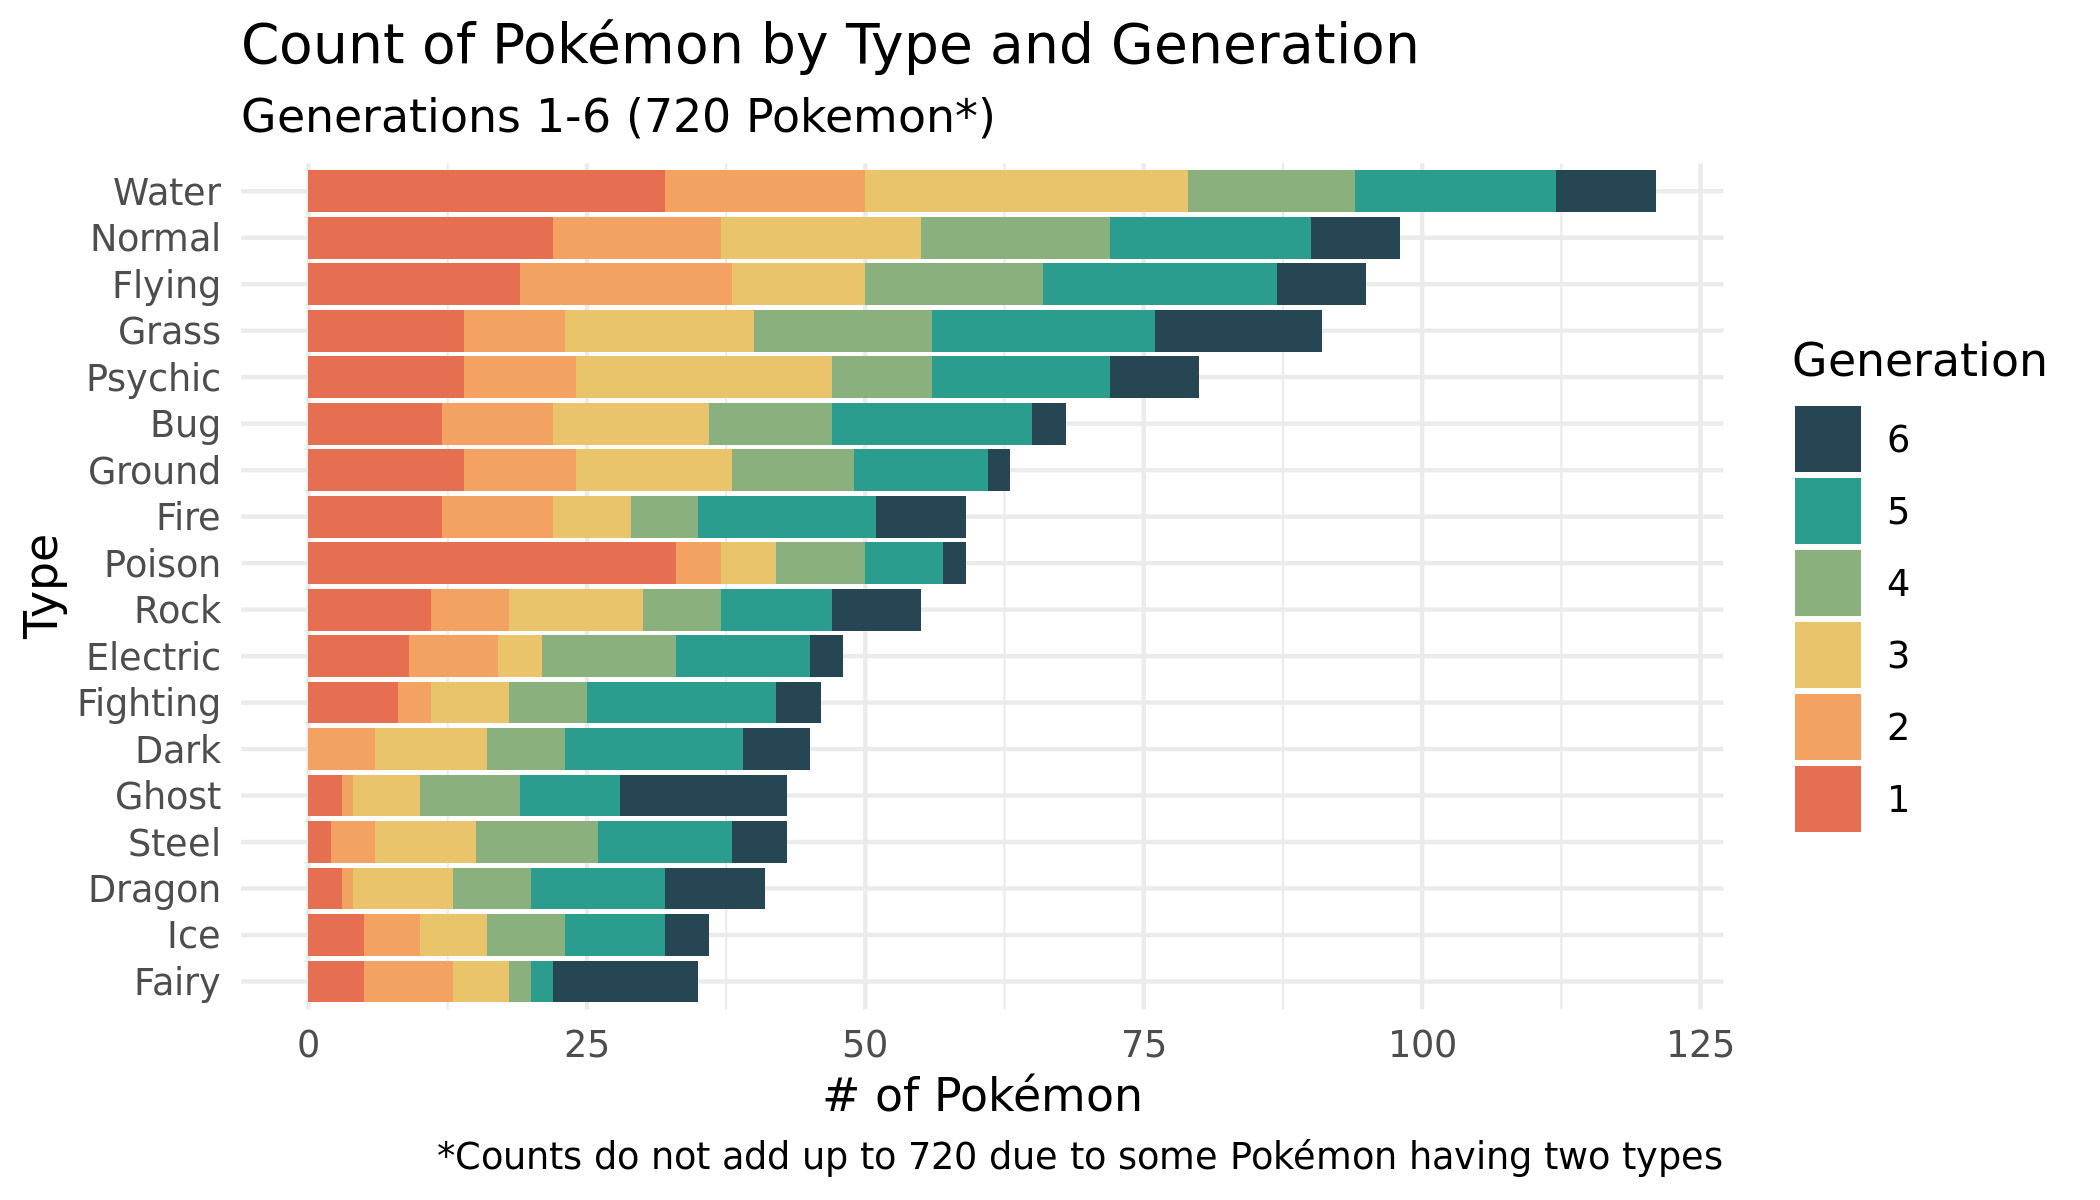

In [25]:
#bar plot of number of pokemon per type
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)

type_sort$Generation <- fct_rev(type_sort$Generation)

p = ggplot(type_sort, aes(y = Type, fill = Generation)) + geom_bar() +
   labs(x = '# of Pokémon',
        title = "Count of Pokémon by Type and Generation",
        subtitle = "Generations 1-6 (720 Pokemon*)",
        caption = "*Counts do not add up to 720 due to some Pokémon having two types") +
   scale_fill_manual(values = colors) +
   theme_minimal()
    
p

In [9]:
Gen_col = pokemon2$Generation

Gen_col |> head()

Gen_col %>% factor %>% levels

#Pokemon up through generation 6 are included in the dataset

[1] 1 1 1 1 1 1

[1] "1" "2" "3" "4" "5" "6"

In [10]:
unique_number <- pokemon2 |>
  summarise(count_unique = n_distinct(`#`))

unique_number |> head()

#there are 720 pokemon in this dataset not including Mega Evolutions

count_unique
<int>
720


`summarise()` has grouped output by 'Type'. You can override using the
`.groups` argument.


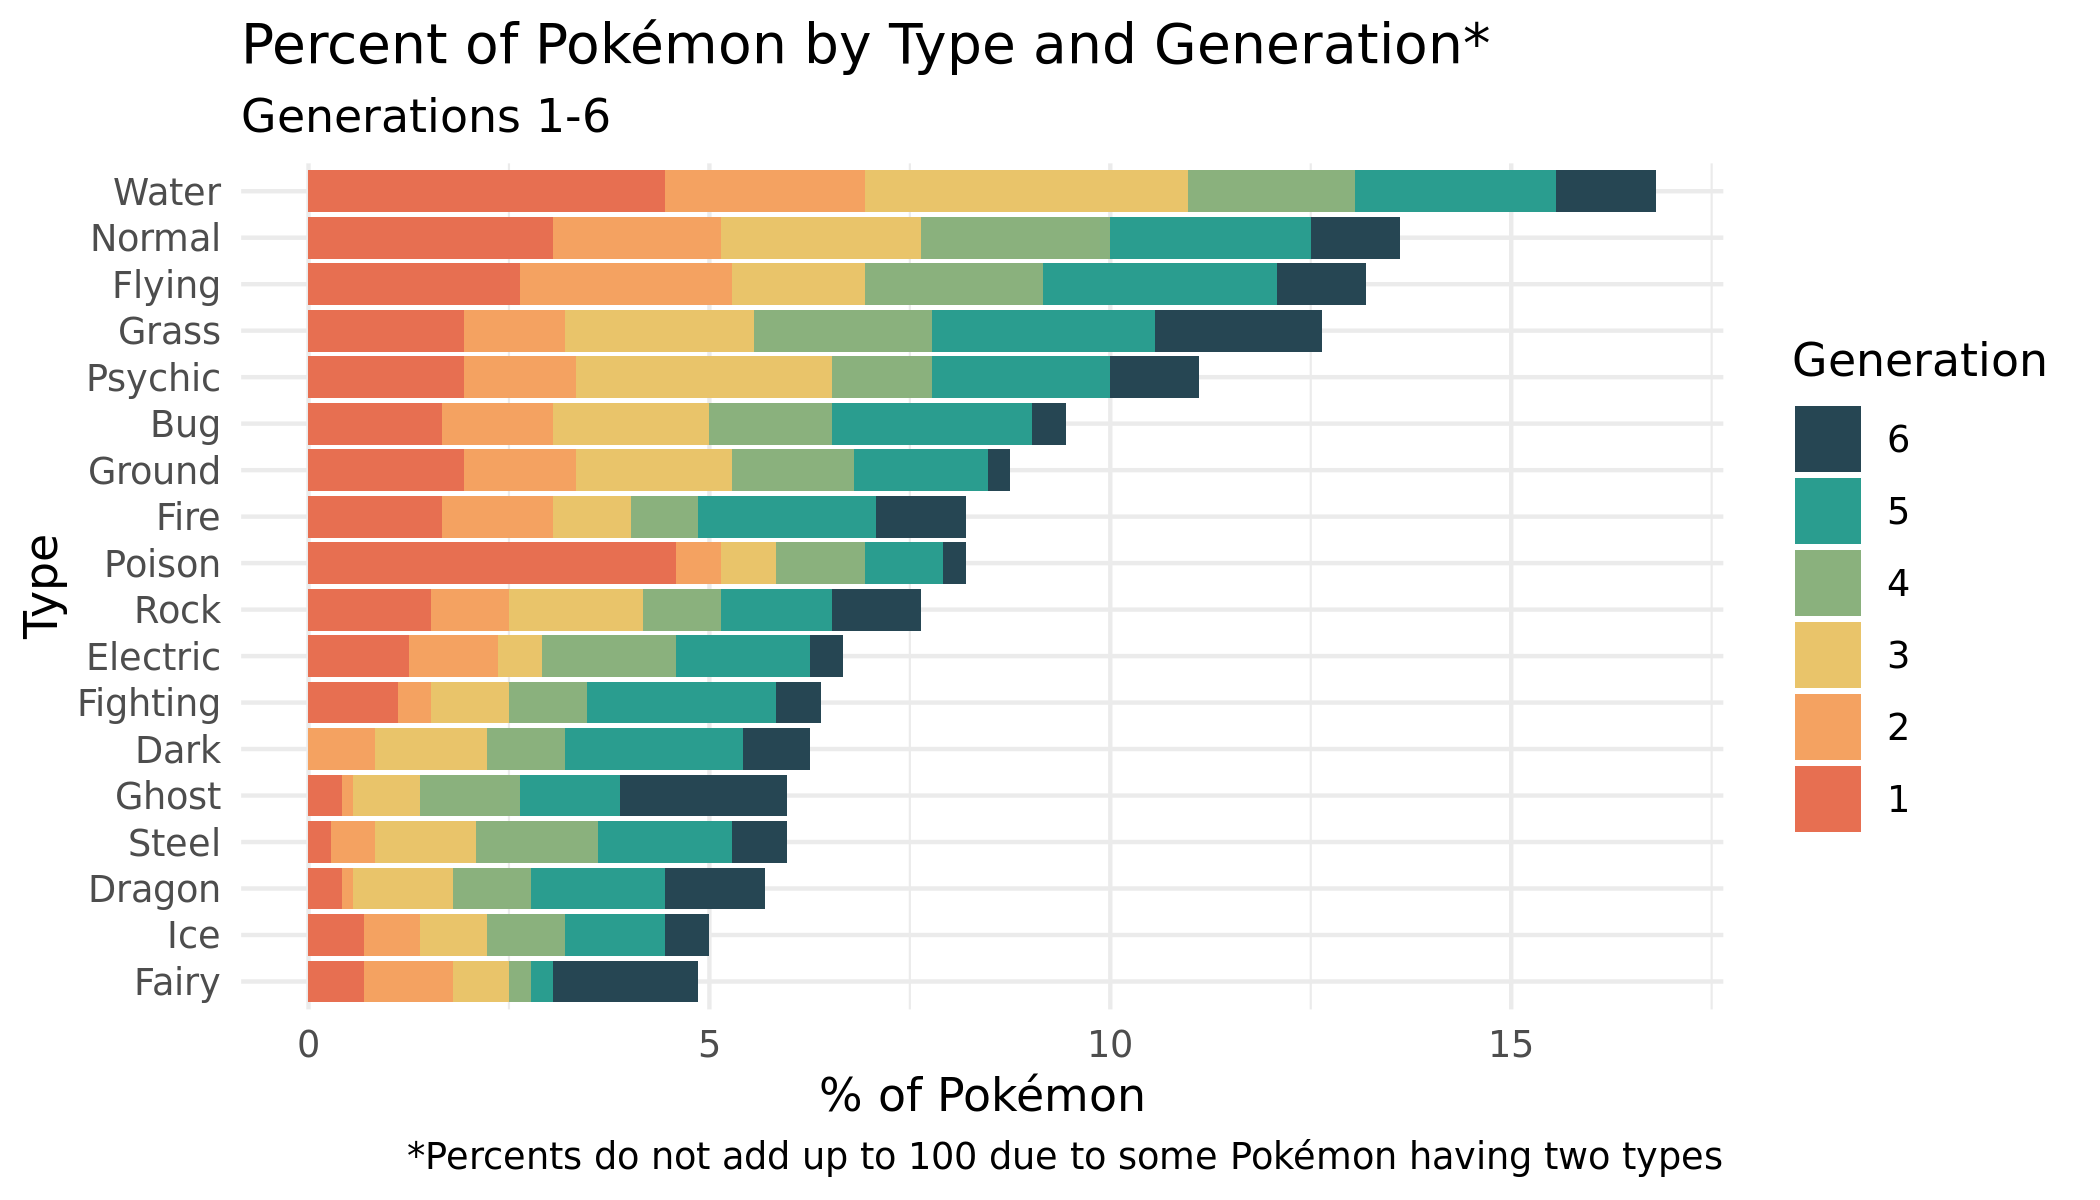

In [26]:
poke_percent <- type_sort |>
  group_by(Type, Generation) |>
  summarise(percentage = n() / 720 * 100)

p = ggplot(poke_percent, aes(x = percentage, y = Type, fill = Generation)) +
  geom_col() +
labs(x = '% of Pokémon',
        title = "Percent of Pokémon by Type and Generation*",
        subtitle = "Generations 1-6",
        caption = "*Percents do not add up to 100 due to some Pokémon having two types")+
scale_fill_manual(values = colors) +
theme_minimal()
p

# I will now make the above plots, but with facet wrapping to see if it enhances the visualization

In [38]:
type_sort2 = type_sort |> mutate(Generation = Generation |> fct_rev())

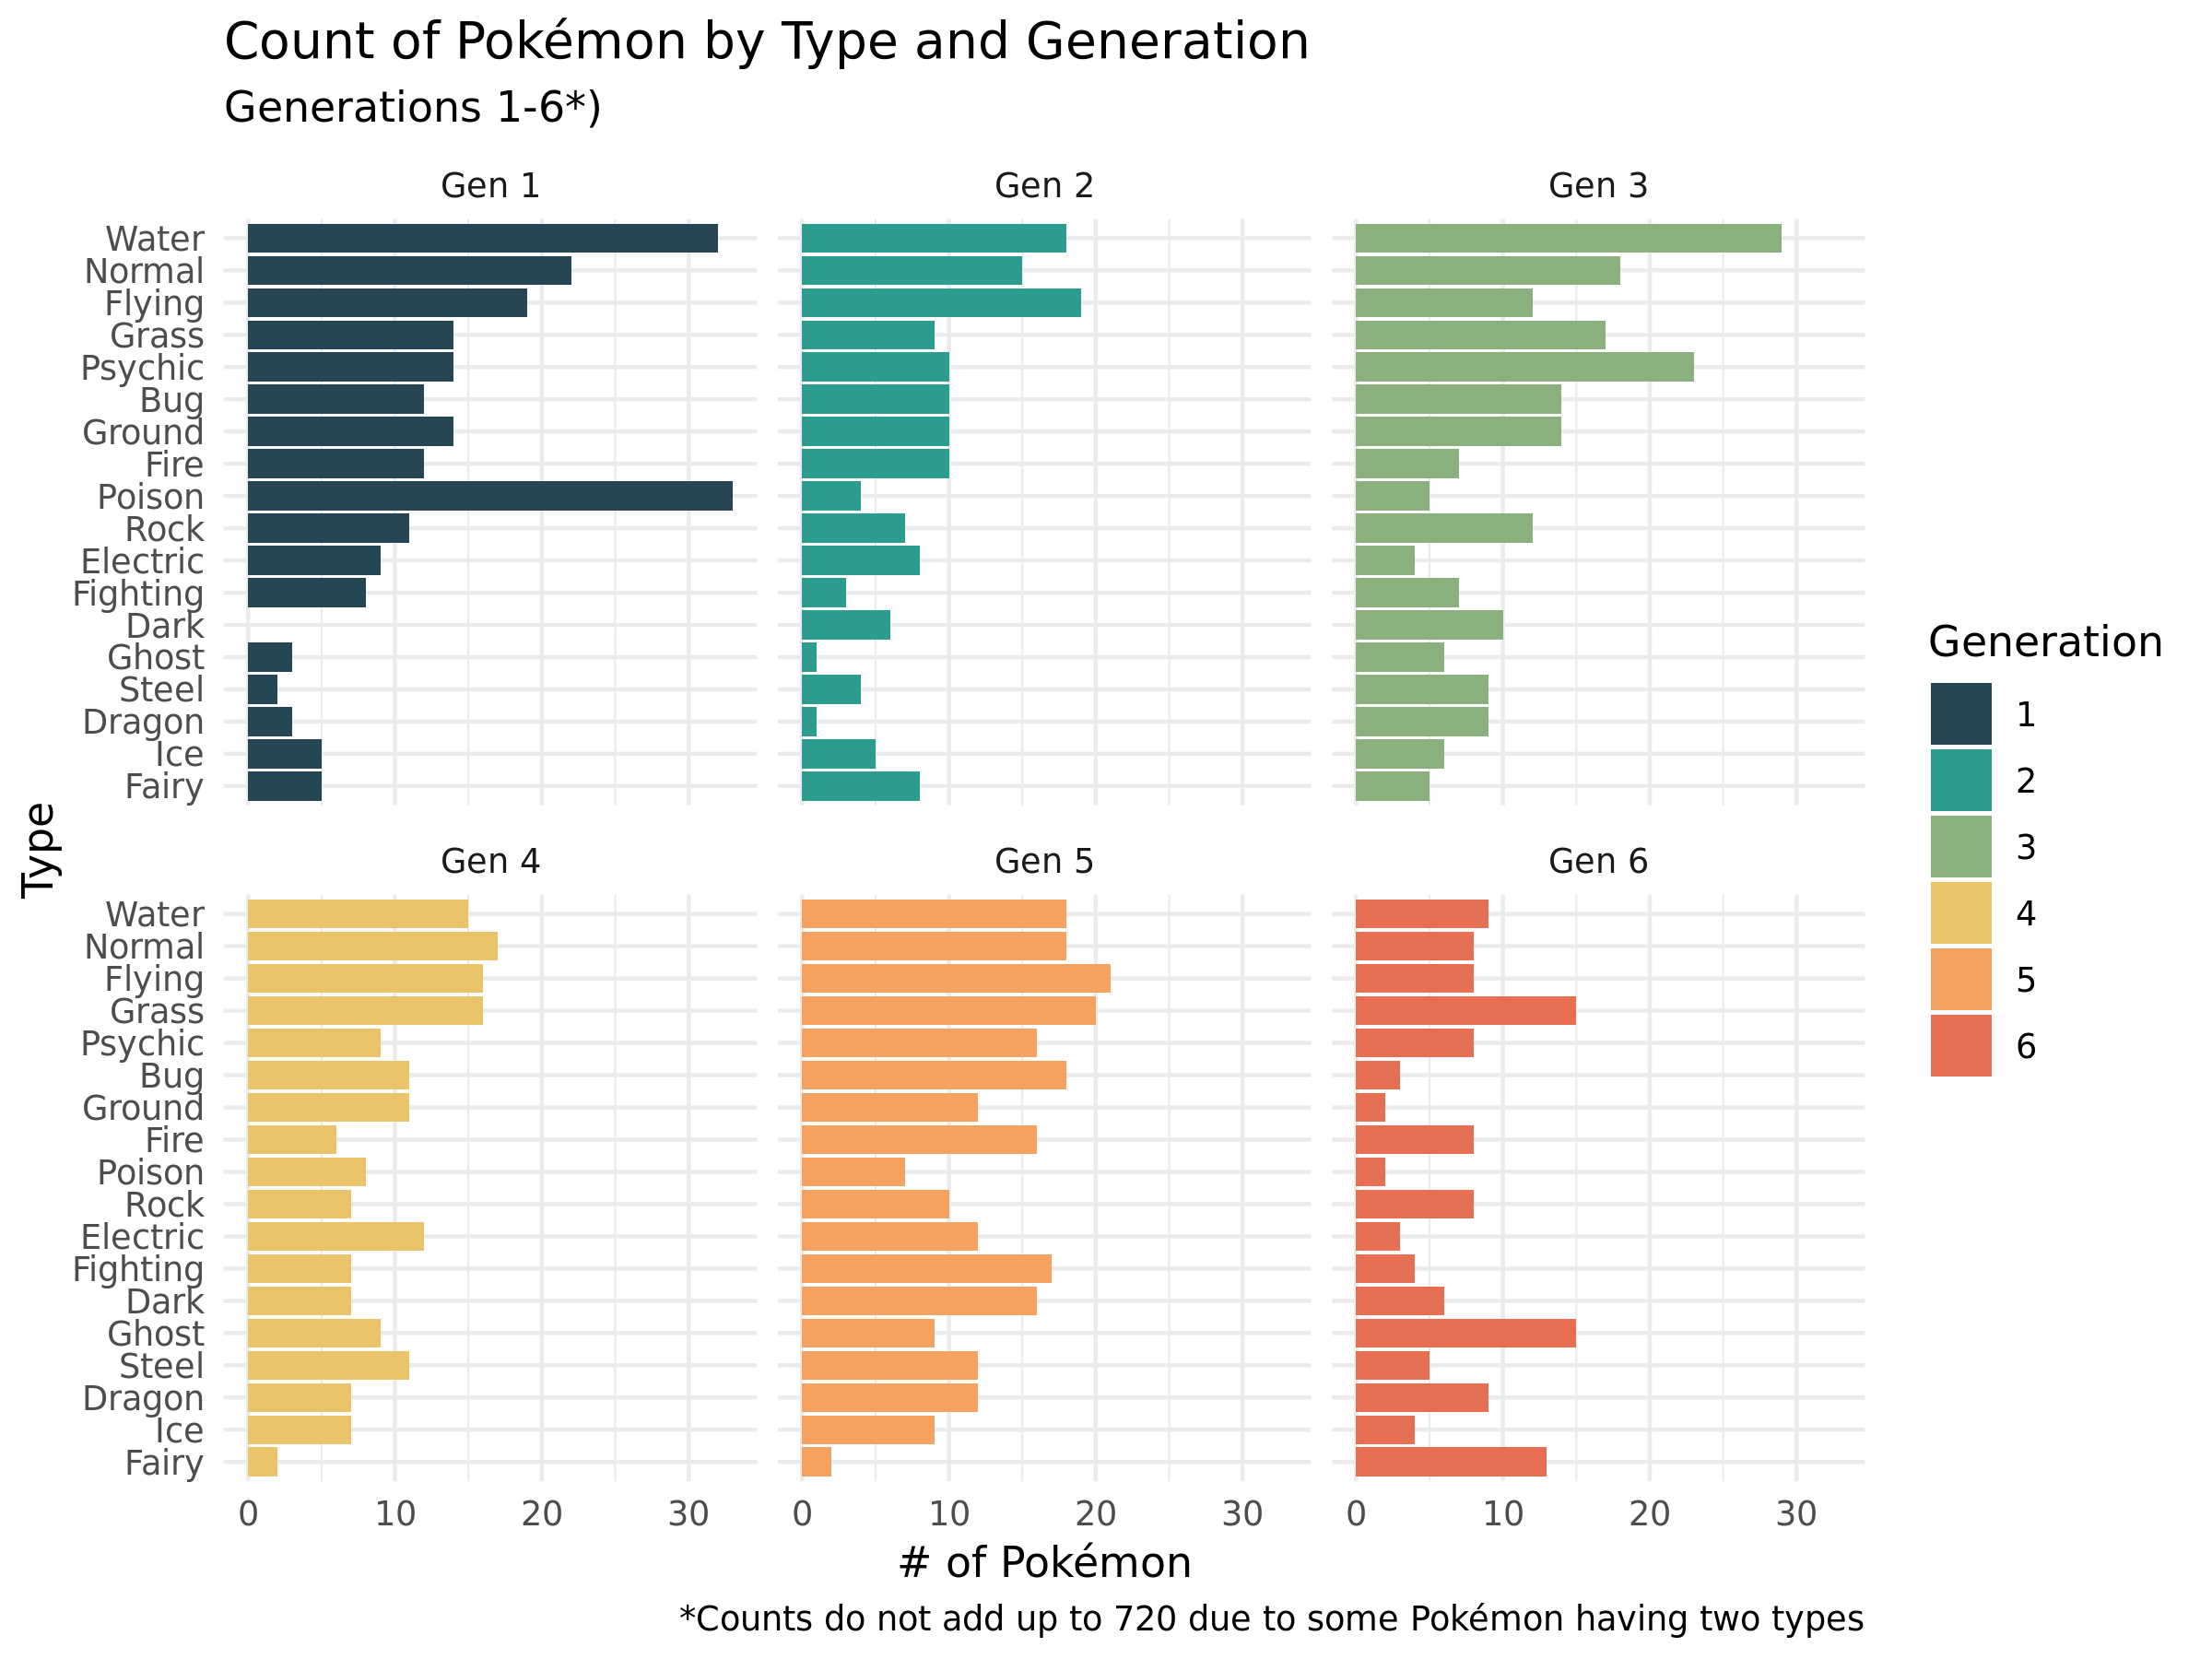

In [53]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 6)

p = ggplot(type_sort2, aes(y = Type, fill = Generation)) + geom_bar() + 
   facet_wrap(~Generation, ncol = 3, labeller = labeller(Generation = c("1" = "Gen 1", "2" = "Gen 2", "3" = "Gen 3", "4" = "Gen 4", "5" = "Gen 5", "6" = "Gen 6"))) +
   labs(x = '# of Pokémon',
        title = "Count of Pokémon by Type and Generation",
        subtitle = "Generations 1-6*)",
        caption = "*Counts do not add up to 720 due to some Pokémon having two types") +
   scale_fill_manual(values = colors) +
   theme_minimal()
    
p

In [ ]:
poke_percent3 <- type_sort |>
  group_by(Type, Generation) |>
  summarise(percentage = n() / 720 * 100)

poke_percent3 <- type_sort |>
  group_by(Type, Generation) |>
  summarise(count = n()) |>
  mutate(total_count = case_when(
    Generation == "1" ~ 150,
    Generation == "2" ~ 100,
    Generation == "3" ~ 135,
    Generation == "4" ~ 107,
    Generation == "5" ~ 156,
    Generation == "6" ~ 72,
    TRUE ~ NA_real_
  ),
  percentage = count / total_count * 100)

poke_percent3 |> head()

In [49]:
poke_percent3 = poke_percent3 |> mutate(Generation = Generation |> fct_rev())

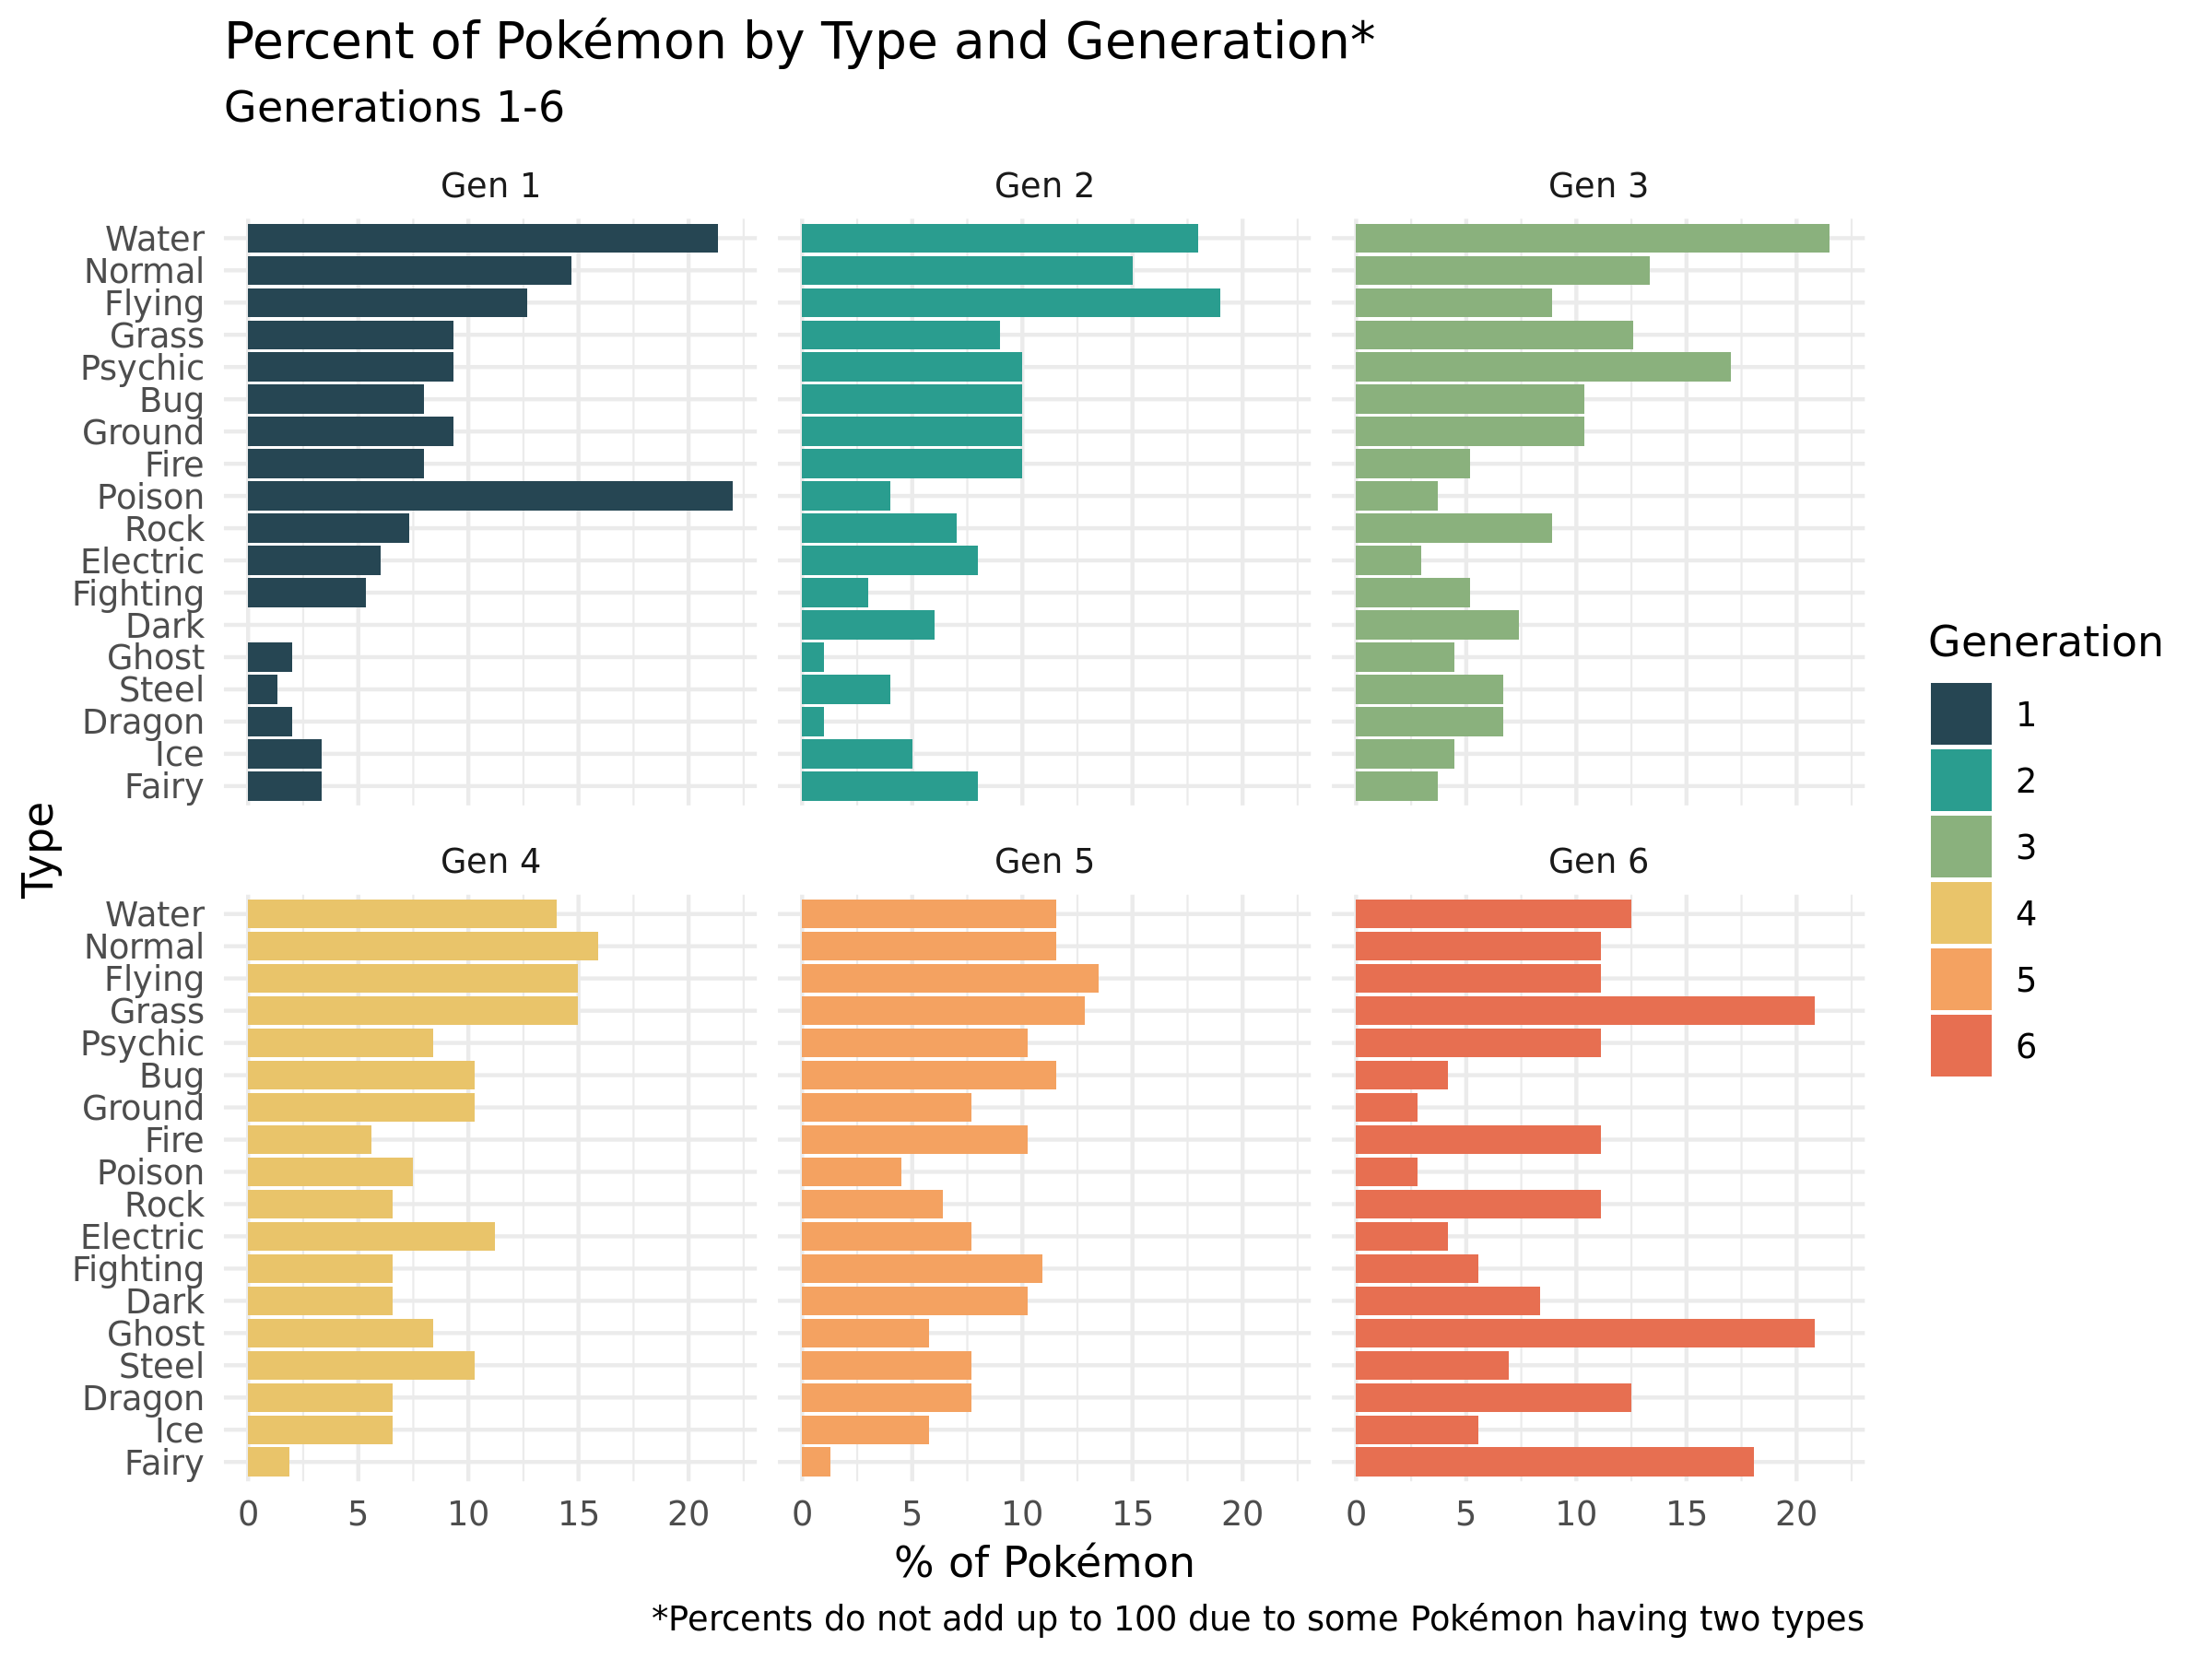

In [54]:
p = ggplot(poke_percent3, aes(x = percentage, y = Type, fill = Generation)) + facet_wrap(~Generation, ncol = 3) +
    geom_col() +
    facet_wrap(~Generation, ncol = 3, labeller = labeller(Generation = c("1" = "Gen 1", "2" = "Gen 2", "3" = "Gen 3", "4" = "Gen 4", "5" = "Gen 5", "6" = "Gen 6"))) +
    labs(x = '% of Pokémon',
        title = "Percent of Pokémon by Type and Generation*",
        subtitle = "Generations 1-6",
        caption = "*Percents do not add up to 100 due to some Pokémon having two types")+
scale_fill_manual(values = colors) +
theme_minimal()

p

# Now I will assess some average statistics by Type and Generation

In [123]:
poke_atk <- type_sort2 |>
  group_by(Type) |>
  summarise(avg_attack = mean(Attack, na.rm = TRUE))

poke_atk |> head()

Type,avg_attack
<fct>,<dbl>
Fairy,55.51429
Ice,79.61111
Dragon,100.43902
Steel,86.74419
Ghost,74.97674
Dark,92.26667


In [127]:
poke_atk_reorder = poke_atk |> mutate(Type = fct_reorder(Type, avg_attack, .desc = TRUE) |> fct_rev())

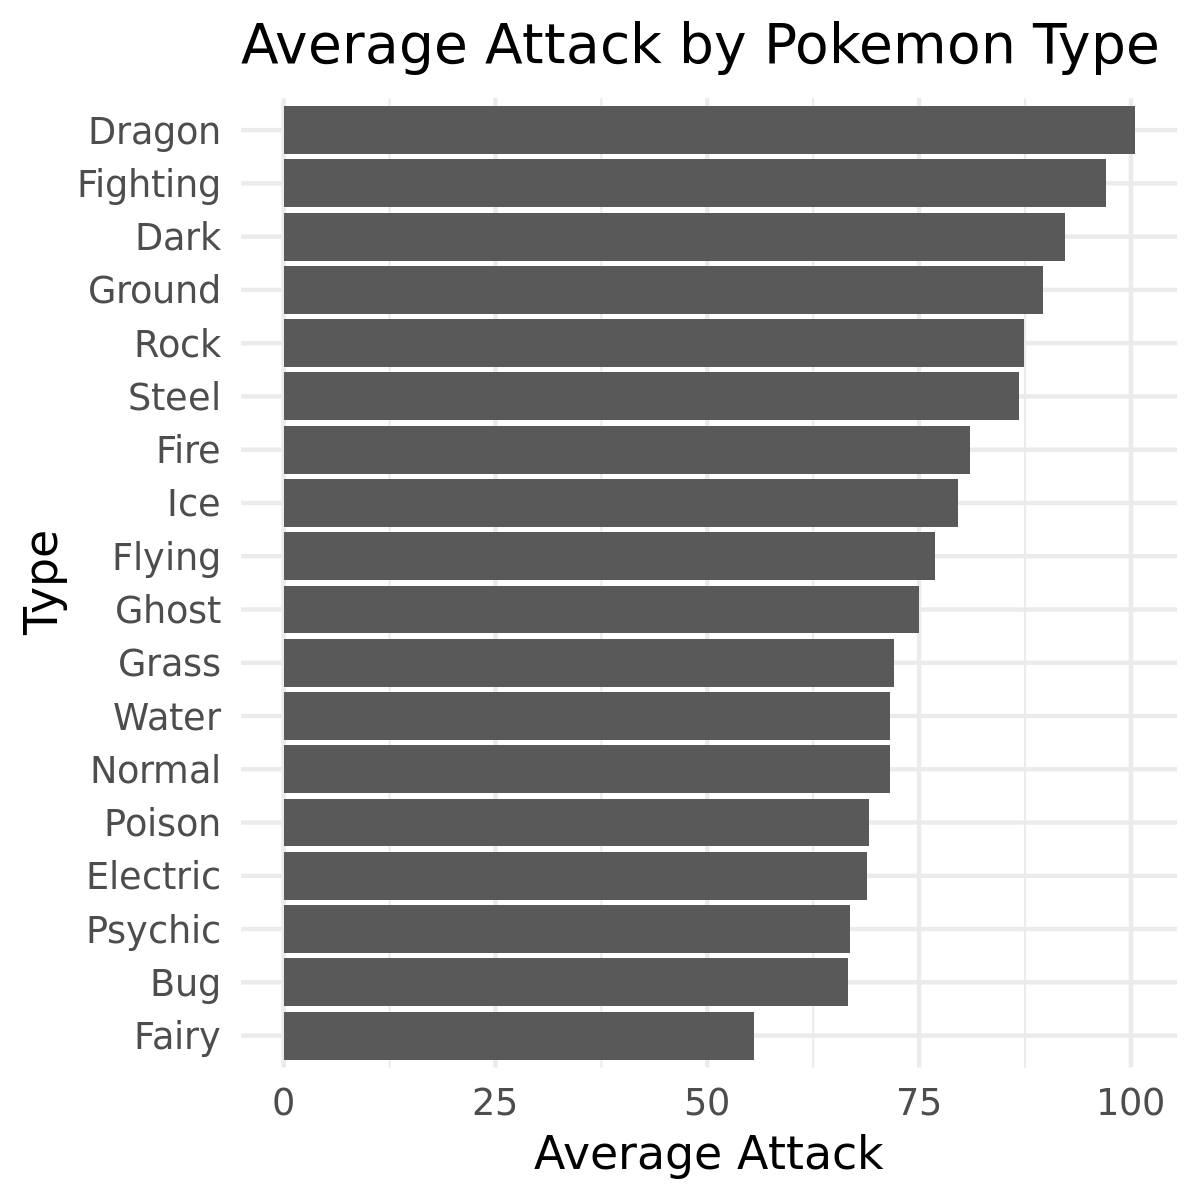

In [129]:
options(repr.plot.res = 300, repr.plot.width = 4, repr.plot.height = 4)

p = ggplot(poke_atk_reorder, aes(y = Type, x = avg_attack)) + geom_col()+
  labs(x = 'Average Attack',
       y = 'Type',
       title = 'Average Attack by Pokemon Type') +
  theme_minimal()

p

## This figure shows the overall average attack power of each Pokemon type averaged across all generations. From this, we can see that Dragon, Fighting, and Dark type Pokemon have the highest overall average attack. Other Pokemon types may be more focused on other stats, such as defense, special attack, special defense, or speed. We can assess this by looking at the same kind of figure for each stat below: ** Outside the scope of this project and I don't have time right now, so will be finished later 

In [68]:
poke_atk2 <- type_sort2 |>
  group_by(Type, Generation) |>
  summarise(avg_attack = mean(Attack, na.rm = TRUE))

poke_atk2 |> head()

`summarise()` has grouped output by 'Type'. You can override using the
`.groups` argument.


Type,Generation,avg_attack
<fct>,<fct>,<dbl>
Fairy,1,55.000
Fairy,2,48.125
Fairy,3,46.000
Fairy,4,37.500
Fairy,5,47.000
Fairy,6,68.000


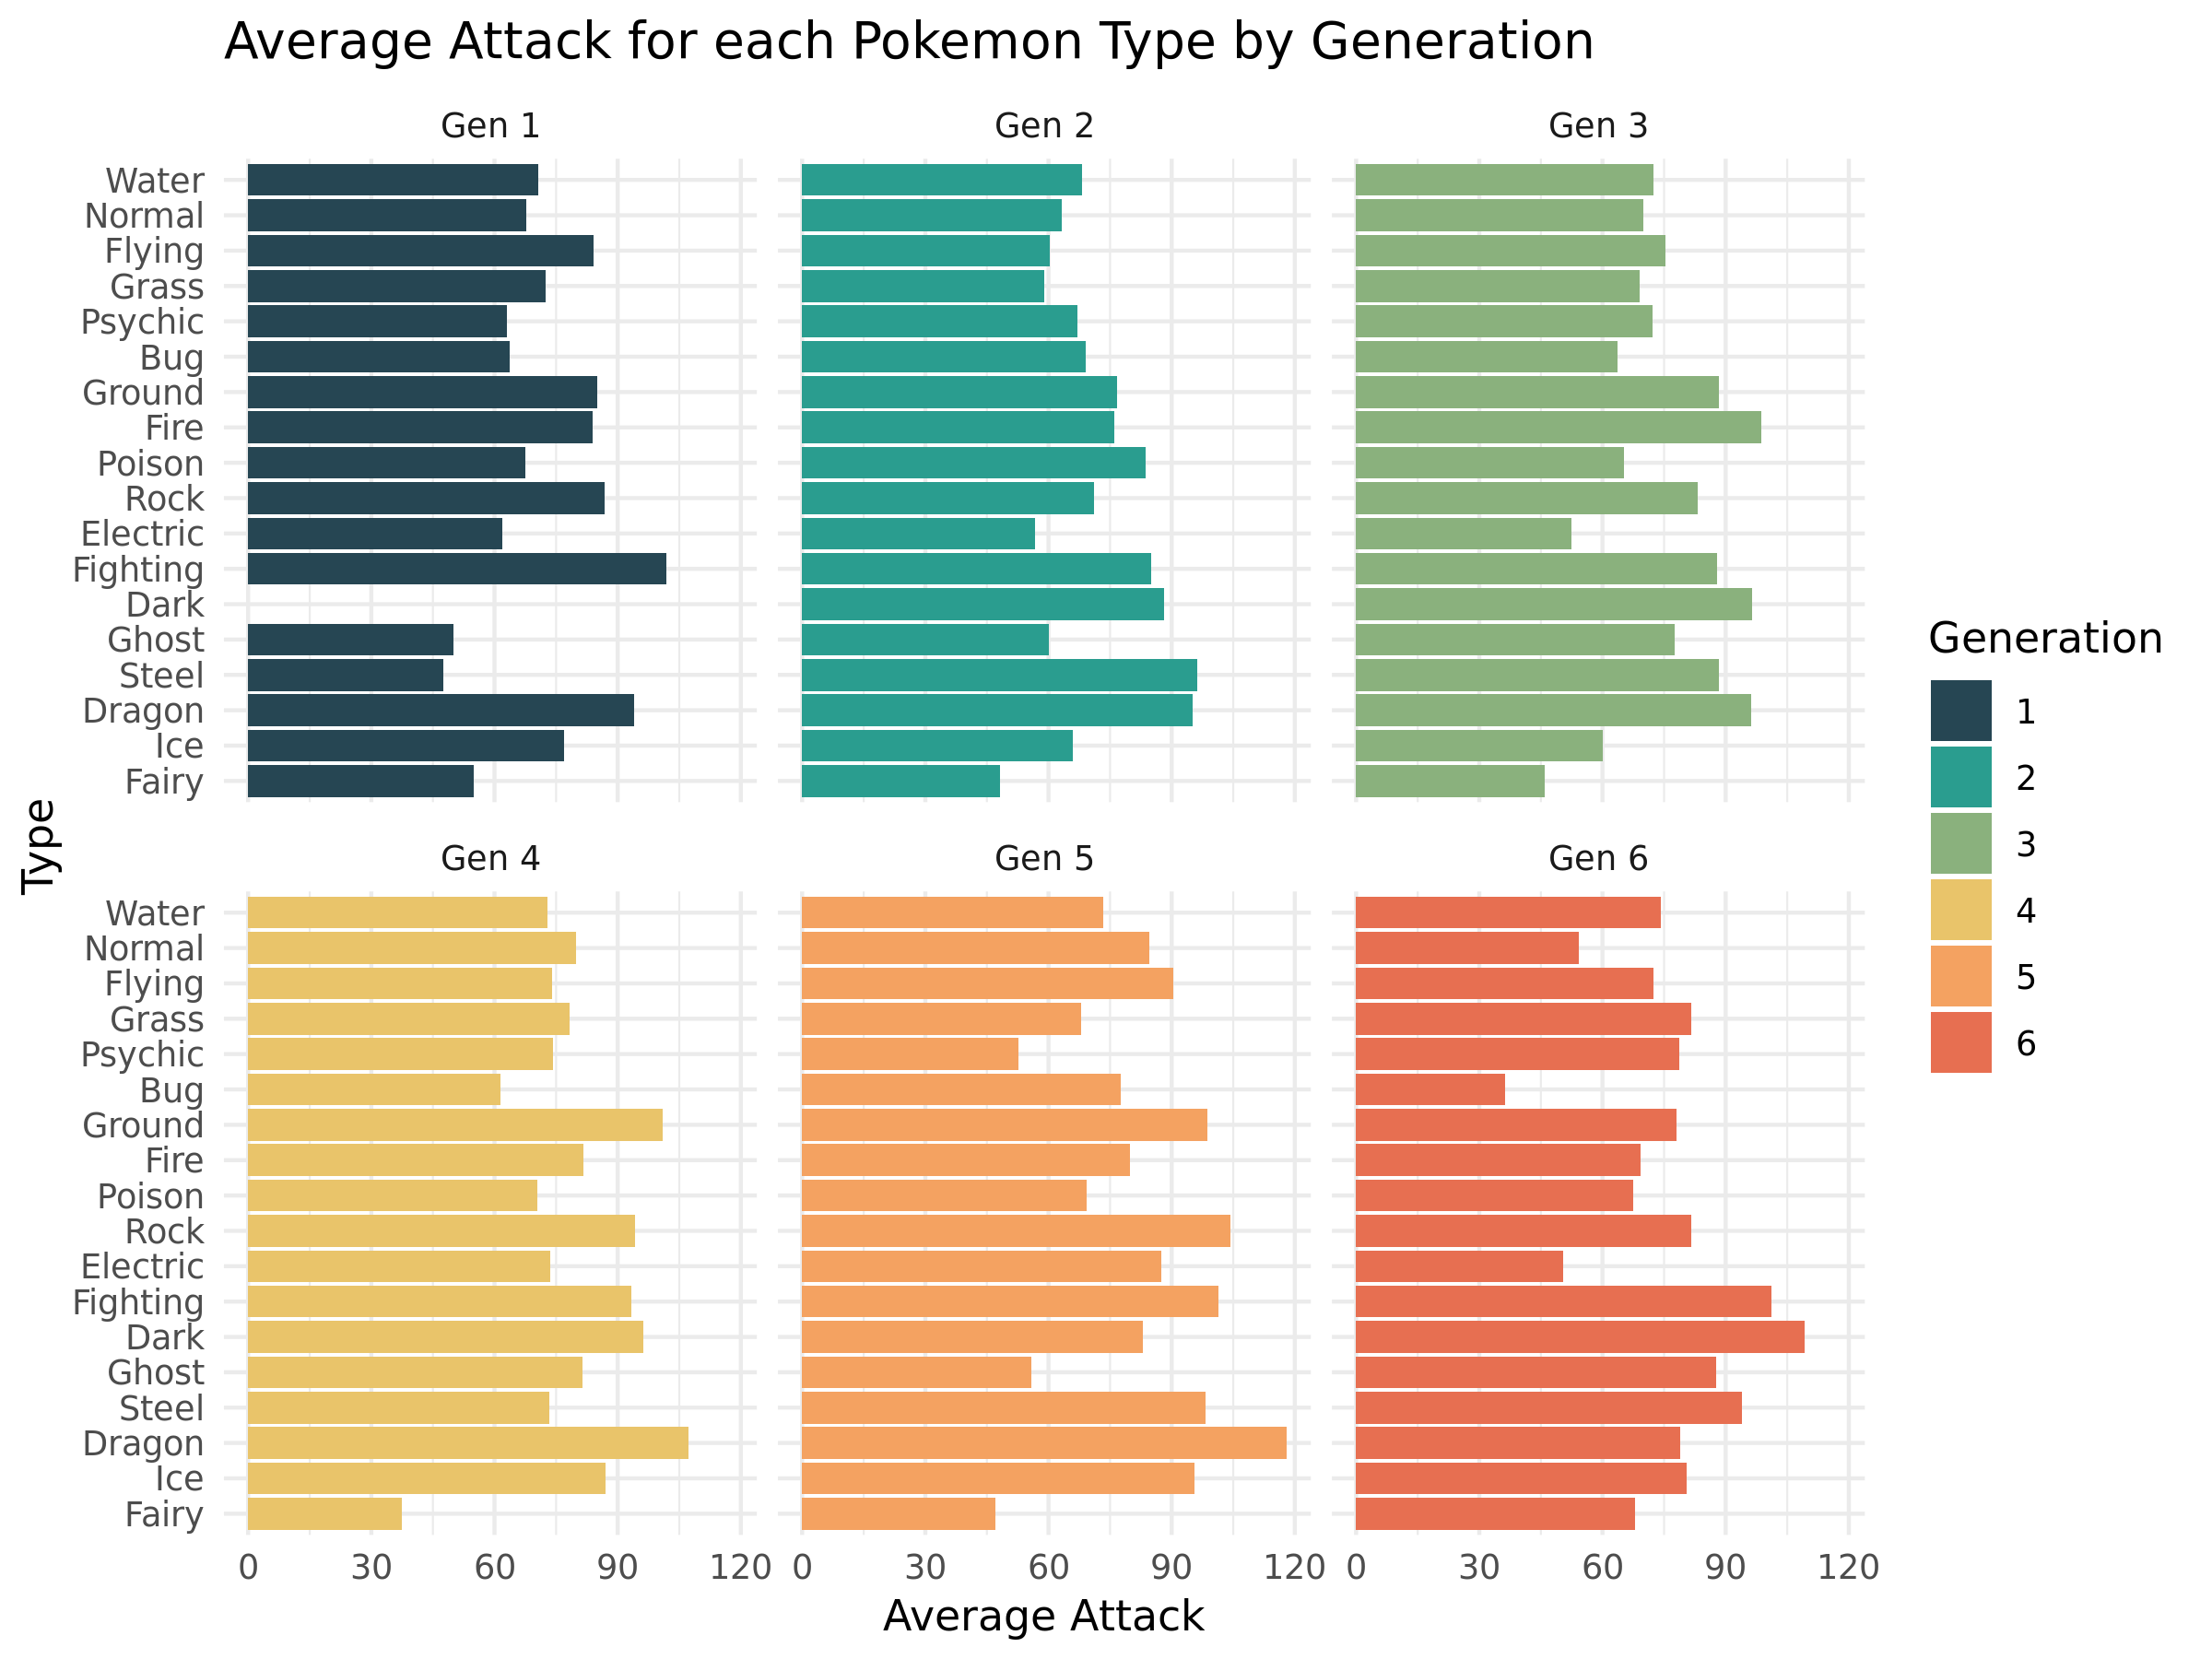

In [108]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 6)

p = ggplot(poke_atk2, aes(y = Type, x = avg_attack, fill = Generation)) + geom_col() + facet_wrap(~Generation, ncol = 3, labeller = labeller(Generation = c("1" = "Gen 1", "2" = "Gen 2", "3" = "Gen 3", "4" = "Gen 4", "5" = "Gen 5", "6" = "Gen 6"))) +
  labs(x = 'Average Attack',
       y = 'Type',
       title = 'Average Attack for each Pokemon Type by Generation') +
  scale_fill_manual(values = colors) +
  theme_minimal()

p

### From the figure above, we can directly compare the average attack power of each Pokemon type within generations. Alternatively, we could plot the average attack of each generation of each type, as shown below:

In [115]:
type_order <- c("Water", "Normal", "Flying", "Grass", "Psychic", "Bug", "Ground", "Fire", "Poison", "Rock","Electric", "Fighting", "Dark", "Ghost", "Steel", "Dragon", "Ice", "Fairy")

# this is just to get the facet wrap to be in the order that matches the colors
poke_atk2$Type <- factor(poke_atk2$Type, levels = type_order)

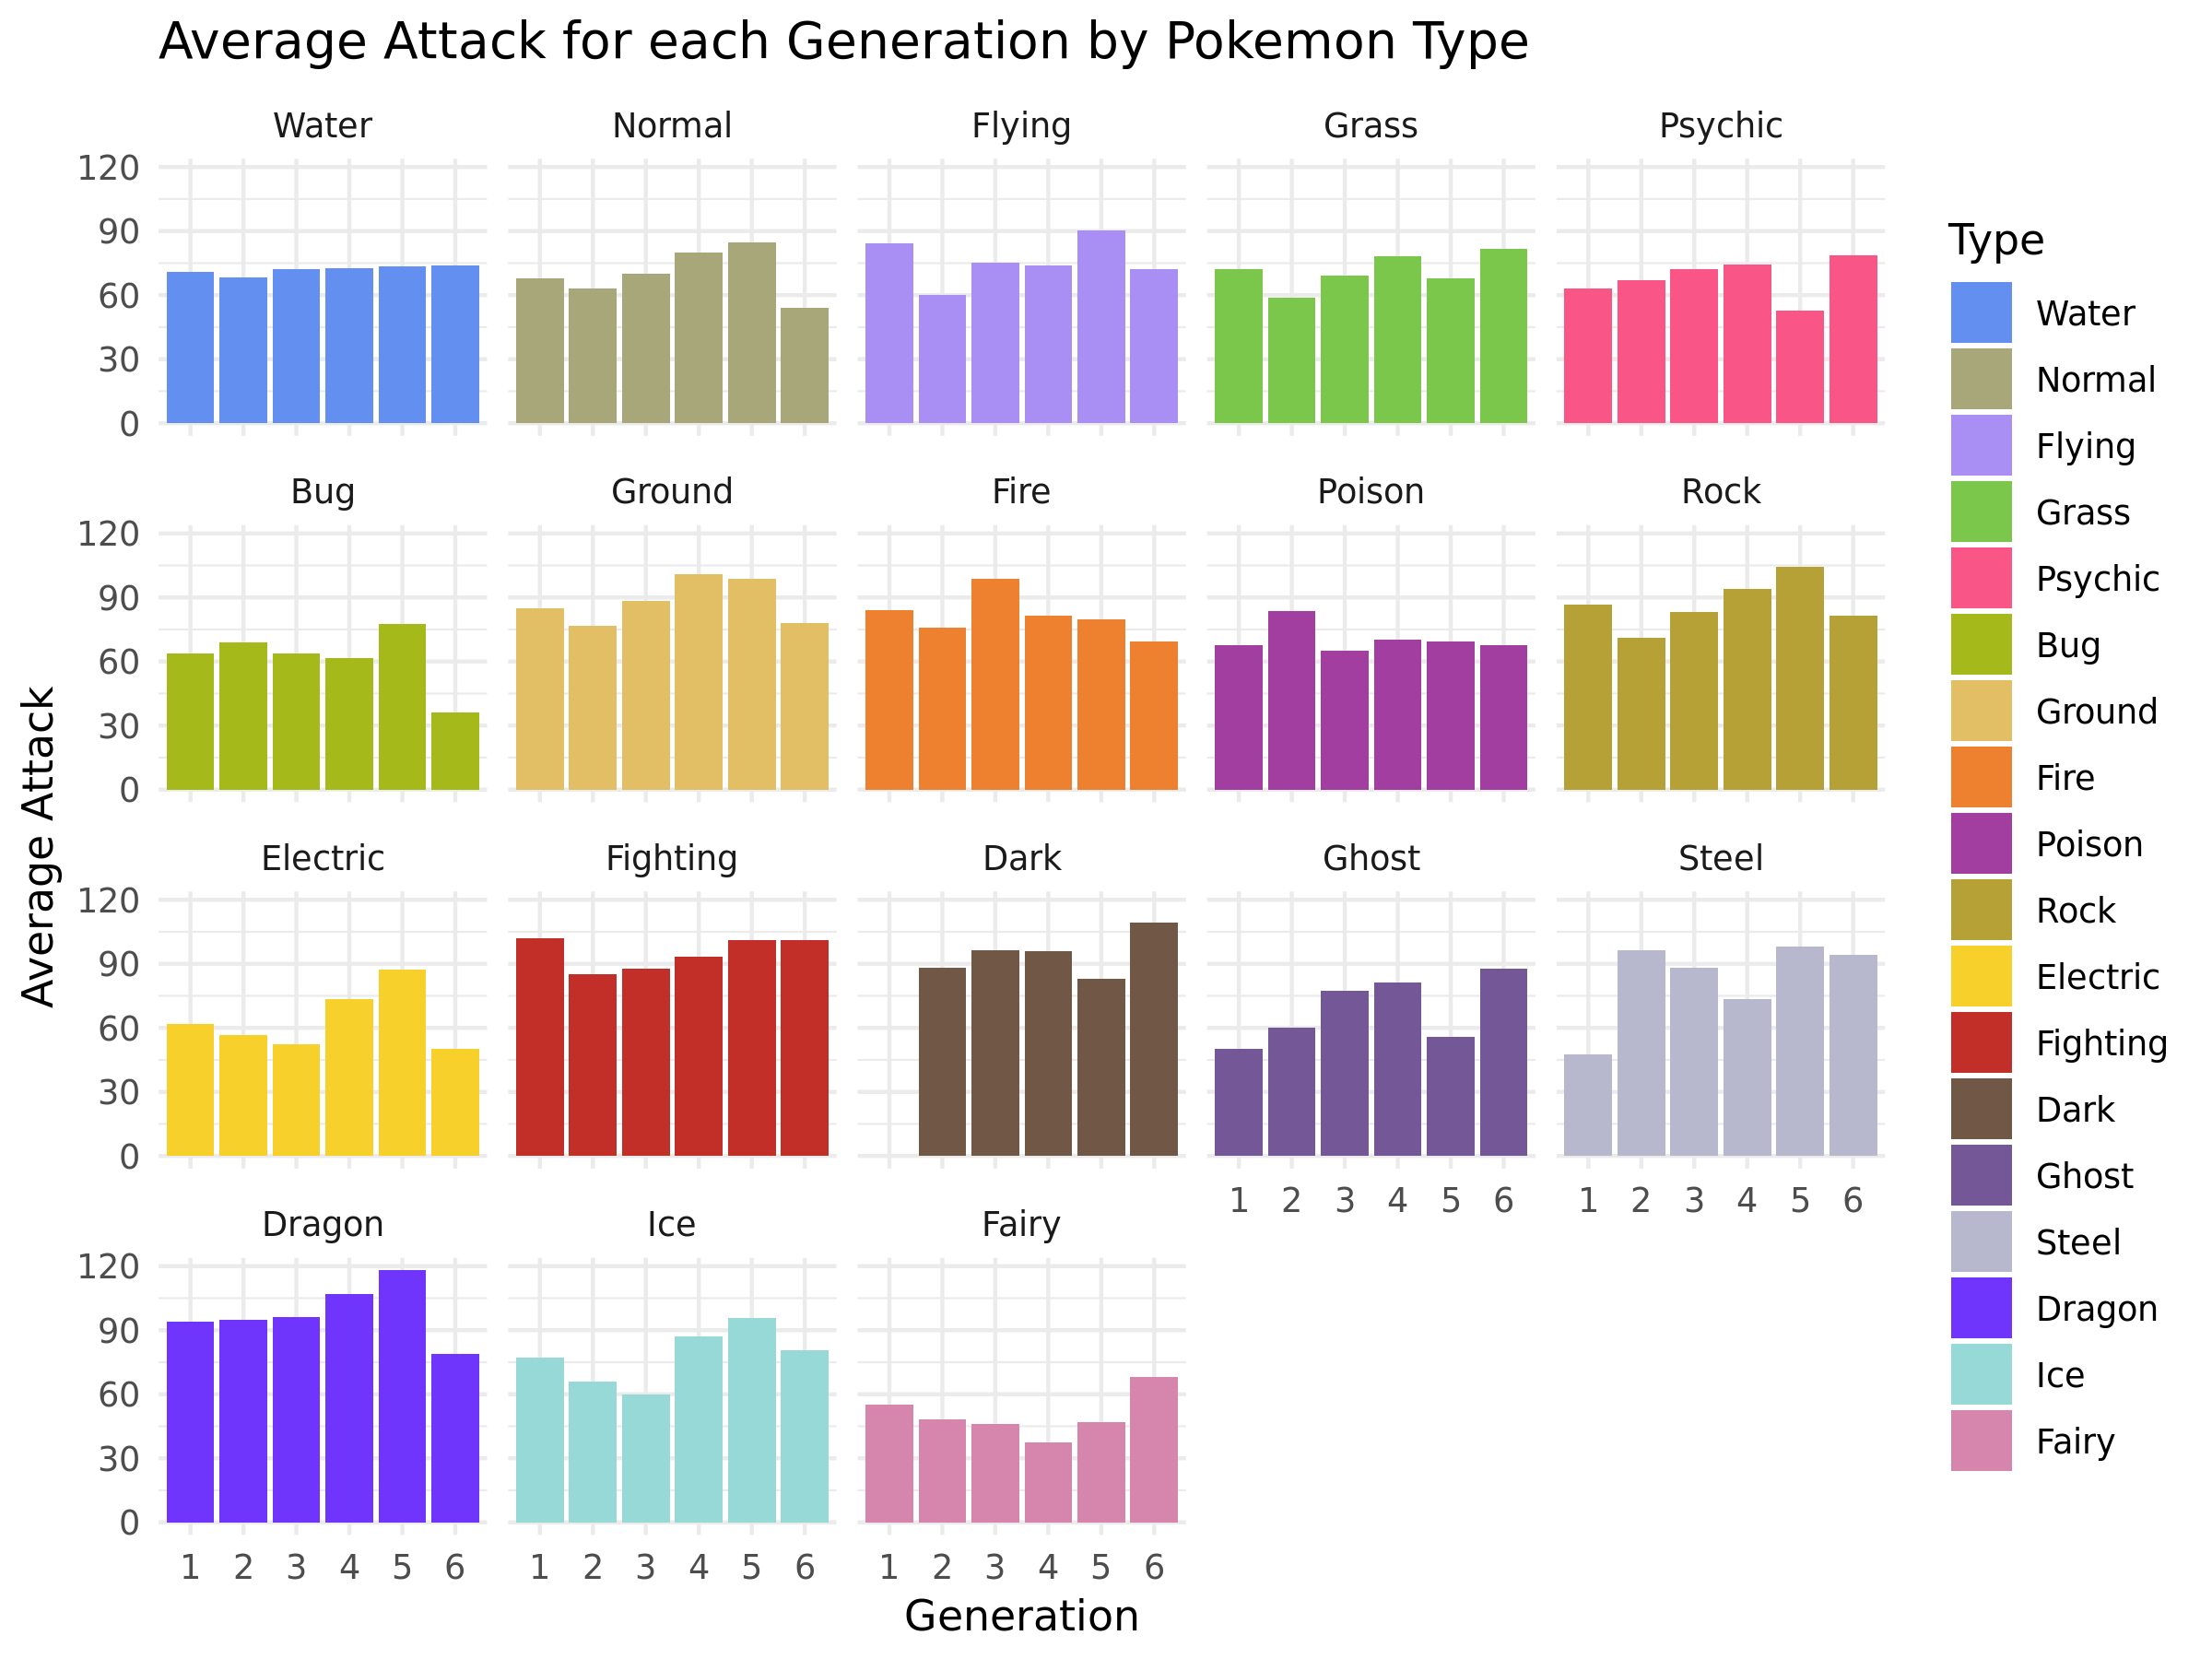

In [119]:
colors2 = c('#6390F0', '#A8A77A', '#A98FF3', '#7AC74C', '#F95587', '#A6B91A', '#E2BF65', '#EE8130', '#A33EA1', '#B6A136', '#F7D02C', '#C22E28', '#705746', '#735797','#B7B7CE', '#6F35FC', '#96D9D6', '#D685AD')

options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 6)

p = ggplot(poke_atk2, aes(x = Generation, y = avg_attack, fill = Type)) + geom_col() + facet_wrap(~Type, ncol = 5) +
  labs(x = 'Generation',
       y = 'Average Attack',
       title = 'Average Attack for each Generation by Pokemon Type') +
  scale_fill_manual(values = colors2) +
  theme_minimal()

p

### Now we can see how each Pokemon type's attack power changed over time. Note that Fairy Type Pokemon did not exist in the first generation of Pokemon.

# Now what about a heatmap?

In [83]:
poke_atk2.scaled <- poke_atk2 |>
    mutate(atk.scaled = scales::rescale(avg_attack))

poke_atk2.scaled |> head()

Type,Generation,avg_attack,atk.scaled
<fct>,<fct>,<dbl>,<dbl>
Fairy,1,55.000,0.5737705
Fairy,2,48.125,0.3483607
Fairy,3,46.000,0.2786885
Fairy,4,37.500,0.0000000
Fairy,5,47.000,0.3114754
Fairy,6,68.000,1.0000000


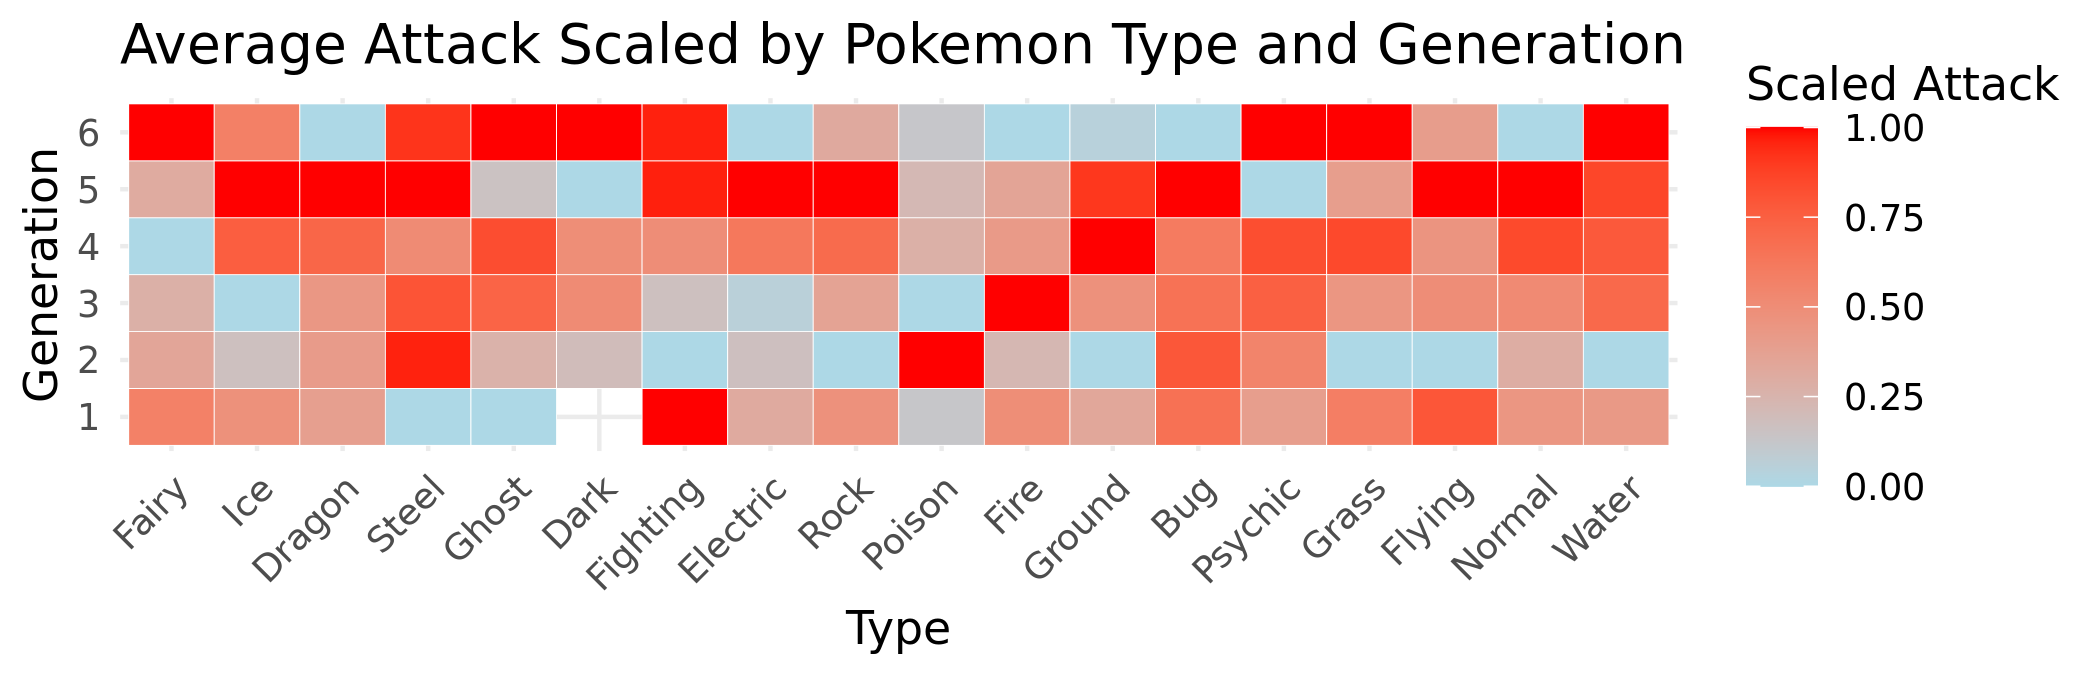

In [107]:
options(repr.plot.width=7, repr.plot.height=2.25, repr.plot.res = 300)

p = ggplot(poke_atk2.scaled, aes(x = Type, y = Generation, fill = atk.scaled)) + geom_tile(color = 'white') +
 labs(x = 'Type',
       y = 'Generation',
       title = 'Average Attack Scaled by Pokemon Type and Generation') +
    scale_fill_gradient(name = "Scaled Attack", low = "lightblue", high = "Red") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

## The figure above can be used to compare relative average attack strength by Pokemon type over Generations

### While overall trends can get lost, it is useful for pointing out particularly strong or particularly weak batches of pokemon in certain generations. For example, we can see that Generation 1 Steel Type Pokemon are particularly weak compared to Steel Type pokemon in other generations. While this may signal that Gen 1 Steel Types focused more on defense or other stats, it may also signal an unbalanced pokemon stat makeup for that generation. 

# I could do this for each of the different stats over time for each type, but that would go far beyond the scope of this final project. If I do end up visualizing it, I will upload it to the same repository in the future.
                        

# Thanks for joining me!